In [1]:
import numpy as np
import theano.tensor as T
from theano import function

In [3]:
# Define variables/objects
# Define a mathematical expression in the form of a function
# Evaluate expressions by passing values
a = T.dscalar('a')
b = T.dscalar('b')
c = a*b
f = function([a,b],c)

In [4]:
f(1.5,3)

array(4.5)

### Theano Variable Types
* t = 0: scalar
* t = 1: vector
* t = 2: matrix
* and so on..


* byte: bscalar, bvector, bmatrix, brow, bcol, btensor3, btensor4
* 16-bit integers: wscalar, wvector, wmatrix, wrow, wcol, wtensor3, wtensor4
* 32-bit integers: iscalar, ivector, imatrix, irow, icol, itensor3, itensor4
* 64-bit integers: lscalar, lvector, lmatrix, lrow, lcol, ltensor3, ltensor4
* float: fscalar, fvector, fmatrix, frow, fcol, ftensor3, ftensor4
* double: dscalar, dvector, dmatrix, drow, dcol, dtensor3, dtensor4
* complex: cscalar, cvector, cmatrix, crow, ccol, ctensor3, ctensor4


In [5]:
# takes an input
# adds the input to the shared variable
# returns the square of shared variable
from theano import shared
x = T.iscalar('x')
sh = shared(0)
f = function([x], sh**2, updates=[(sh,sh+x)])

In [9]:
print "function returns value %d" % f(1)

function returns value 9


### Theano Functions

In [12]:
#Return Multiple Values
a = T.dscalar('a')
f = function([a],[a**2, a**3])
f(3)

[array(9.0), array(27.0)]

In [13]:
x = T.dscalar('x')
y = x**3
qy = T.grad(y,x)
f = function([x],qy)
f(4)

array(48.0)

In [14]:
from theano import pp  #pretty-print
print(pp(qy))

((fill((x ** TensorConstant{3}), TensorConstant{1.0}) * TensorConstant{3}) * (x ** (TensorConstant{3} - TensorConstant{1})))


In [15]:
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np

#Define variables:
x = T.vector('x')
w = T.vector('w')
b = T.scalar('b')

#Define mathematical expression:
z = T.dot(x,w)+b
a = ifelse(T.lt(z,0),0,1)

neuron = theano.function([x,w,b],a)


In [16]:
#Define inputs and weights
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
weights = [ 1, 1]
bias = -1.5

#Iterate through all inputs and find outputs:
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t,weights,bias)
    print 'The output for x1=%d | x2=%d is %d' % (t[0],t[1],out)

The output for x1=0 | x2=0 is 0
The output for x1=0 | x2=1 is 0
The output for x1=1 | x2=0 is 0
The output for x1=1 | x2=1 is 1


In [17]:
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np

#Define variables:
x = T.vector('x')
w = theano.shared(np.array([1,1]))
b = theano.shared(-1.5)

#Define mathematical expression:
z = T.dot(x,w)+b
a = ifelse(T.lt(z,0),0,1)

neuron = theano.function([x],a)

#Define inputs and weights
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

#Iterate through all inputs and find outputs:
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t)
    print 'The output for x1=%d | x2=%d is %d' % (t[0],t[1],out)

The output for x1=0 | x2=0 is 0
The output for x1=0 | x2=1 is 0
The output for x1=1 | x2=0 is 0
The output for x1=1 | x2=1 is 1


In [18]:
#Gradient
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np
from random import random

#Define variables:
x = T.matrix('x')
w = theano.shared(np.array([random(),random()]))
b = theano.shared(1.)
learning_rate = 0.01

#Define mathematical expression:
z = T.dot(x,w)+b
a = 1/(1+T.exp(-z))

In [19]:
a_hat = T.vector('a_hat') #Actual output
cost = -(a_hat*T.log(a) + (1-a_hat)*T.log(1-a)).sum()

In [20]:
dw,db = T.grad(cost,[w,b])

train = function(
    inputs = [x,a_hat],
    outputs = [a,cost],
    updates = [
        [w, w-learning_rate*dw],
        [b, b-learning_rate*db]
    ]
)

The outputs of the NN are:
The output for x1=0 | x2=0 is 0.00
The output for x1=0 | x2=1 is 0.02
The output for x1=1 | x2=0 is 0.02
The output for x1=1 | x2=1 is 0.98

The flow of cost during model run is as following:


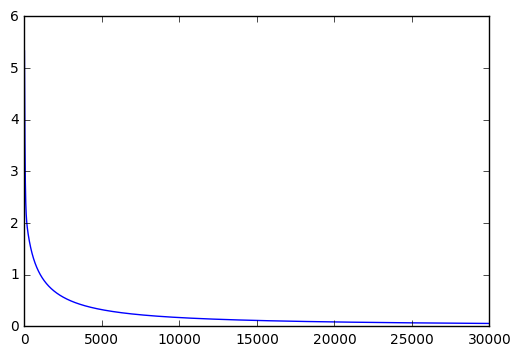

In [22]:
#Define inputs and weights
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
outputs = [0,0,0,1]

#Iterate through all inputs and find outputs:
cost = []
for iteration in range(30000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
#Print the outputs:
print 'The outputs of the NN are:'
for i in range(len(inputs)):
    print 'The output for x1=%d | x2=%d is %.2f' % (inputs[i][0],inputs[i][1],pred[i])
    
#Plot the flow of cost:
print '\nThe flow of cost during model run is as following:'
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost)

### Modeling a Two-Layer Neural Network

In [23]:
# Define variables
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np
from random import random

#Define variables:
x = T.matrix('x')
w1 = theano.shared(np.array([random(),random()]))
w2 = theano.shared(np.array([random(),random()]))
w3 = theano.shared(np.array([random(),random()]))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01

In [27]:
# Define mathematical expression
a1 = 1/(1+T.exp(-T.dot(x,w1)-b1))
a2 = 1/(1+T.exp(-T.dot(x,w2)-b1))
x2 = T.stack([a1,a2],axis=1)
a3 = 1/(1+T.exp(-T.dot(x2,w3)-b2))

In [28]:
# Define gradient and update rule
a_hat = T.vector('a_hat') #Actual output
cost = -(a_hat*T.log(a3) + (1-a_hat)*T.log(1-a3)).sum()
dw1,dw2,dw3,db1,db2 = T.grad(cost,[w1,w2,w3,b1,b2])

train = function(
    inputs = [x,a_hat],
    outputs = [a3,cost],
    updates = [
        [w1, w1-learning_rate*dw1],
        [w2, w2-learning_rate*dw2],
        [w3, w3-learning_rate*dw3],
        [b1, b1-learning_rate*db1],
        [b2, b2-learning_rate*db2]
    ]
)

The outputs of the NN are:
The output for x1=0 | x2=0 is 0.99
The output for x1=0 | x2=1 is 0.01
The output for x1=1 | x2=0 is 0.01
The output for x1=1 | x2=1 is 0.99

The flow of cost during model run is as following:


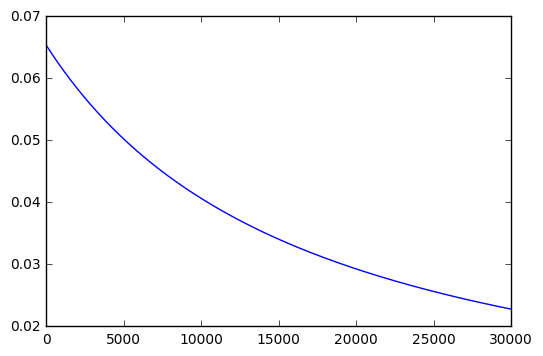

In [29]:
# Train the model
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
outputs = [1,0,0,1]

#Iterate through all inputs and find outputs:
cost = []
for iteration in range(30000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
#Print the outputs:
print 'The outputs of the NN are:'
for i in range(len(inputs)):
    print 'The output for x1=%d | x2=%d is %.2f' % (inputs[i][0],inputs[i][1],pred[i])
    
#Plot the flow of cost:
print '\nThe flow of cost during model run is as following:'
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost)
